In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf

---

# Saving your plot to a file:

`mplfinance.plot()` allows you to save your plot to a file using the `savefig` keyword.  The value of `savefig` may be a `str` or `dict`.  If the value is a `str` then it is assumed to be the file name to which to save the figure/plot.  

If the file extension is one of those recognized by `matplotlib.pyplot.savefig()` then the file type will be inferred from the extension, for example: `.pdf`, `.svg`, `.png`, `.jpg` ...


In [3]:
df = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)

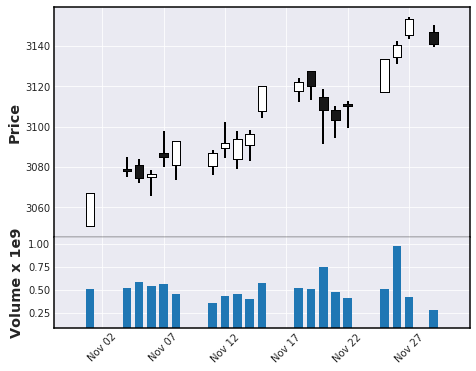

In [4]:
mpf.plot(df,type='candle',volume=True,savefig='testsave.png')

---

#### We can use IPython.display to display the image file here in the notebook:

In [5]:
from IPython.display import Image

-rw-rw-rw- 1 dino dino 15627 Jan 14 12:36 testsave.png


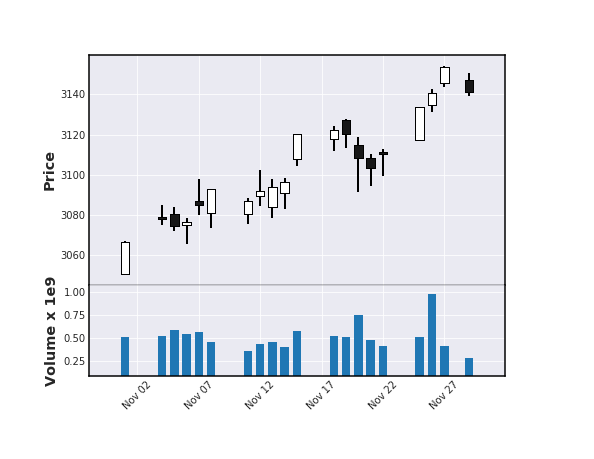

In [6]:
%ls -l testsave.png
Image(filename='testsave.png')

---

# Specifying image attributes with `savefig`

We can control various attributes of the saved figure/plot by passing a `dict`ionary as the value for the `savefig` keyword.

The dictionary **must** contain the keyword `fname` for the file name to be saved, **and *may* contain any of the other keywords accepted by [`matplotlib.pyplot.savefig()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)**  (for example: dpi, facecolor, edgecolor, orientation, format, metadata, quality)

When creating the `dict`, I recommend using the `dict()` constructor so that that `keyword=` syntax may be used and thereby more closely resemble calling:
**[`matplotlib.pyplot.savefig()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)**


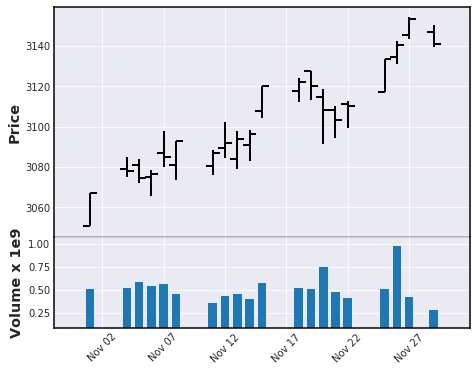

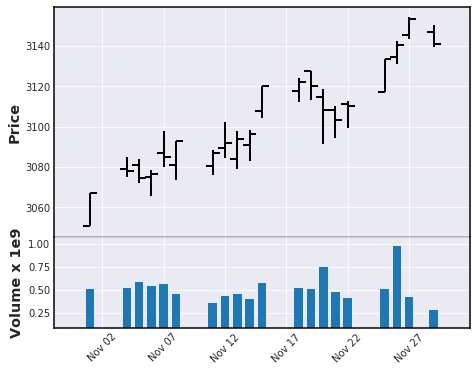

In [7]:
save = dict(fname='tsave30.jpg',dpi=30,pad_inches=0.25)
mpf.plot(df,volume=True,savefig=save)
mpf.plot(df,volume=True,savefig=dict(fname='tsave100.jpg',dpi=100,pad_inches=0.25))

-rw-rw-rw- 1 dino dino 12630 Jan 14 12:36 tsave30.jpg
-rw-rw-rw- 1 dino dino 60515 Jan 14 12:36 tsave100.jpg


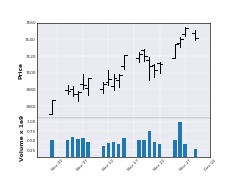

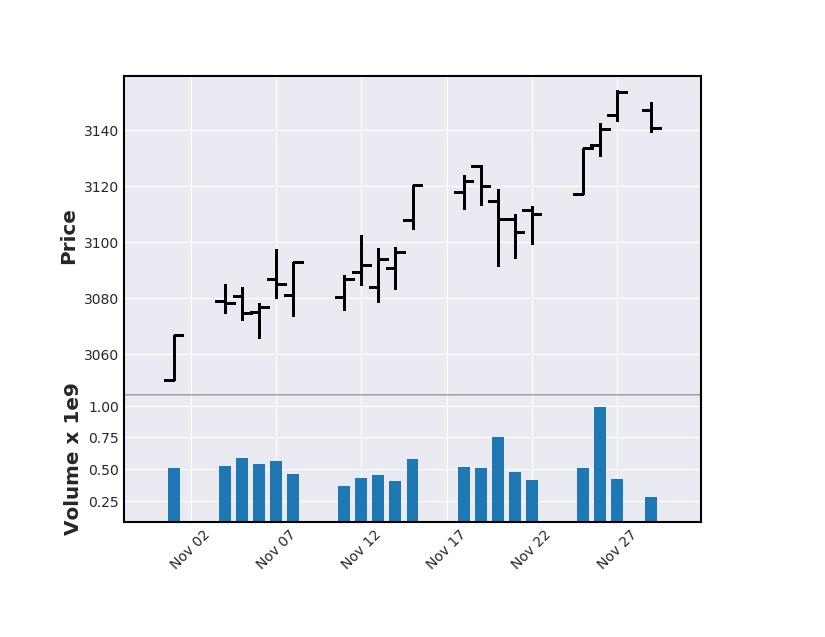

In [8]:
%ls -l tsave30.jpg
%ls -l tsave100.jpg
Image(filename='tsave30.jpg')
Image(filename='tsave100.jpg')

---

## A note about `jpeg` files:

**[`matplotlib.pyplot.savefig()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)** uses the Python Image Library (PIL or pillow) to save jpeg files.  
Thus you must have pillow installed (`pip install pillow`) to save jpeg images.  

**The current version of matplotlib (3.1.2) on PyPI has an incompatibility with version 7.x.x of pillow** (which was released to PyPI on On January 2, 2020.  This incompatibility was **[fixed here](https://github.com/matplotlib/matplotlib/pull/16086/commits)** however (as of this writting) the fixed version of matplotlib is not yet on PyPI (to be pip installable).

If you encounter an exception when trying to save a jpeg file, that says "format 'jpg' is not supported" check that you have pillow installed.  If you do have pillow 7.x.x installed, and you are encountering this exception, the permanent fix for the problem is to wait until the new version of matplotlib is on PyPI and `pip install --upgrade matplotlib`.  

In the meantime you can immediately fix this problem in one of the following temporary solutions:

- install the previous version of pillow: **`pip install Pillow==6.2.2`**
- edit your installed version of `.../site-packages/matplotlib/backend_bases.py` and apply **[this one-line fix](https://github.com/matplotlib/matplotlib/pull/16086/files).**

I personally recommend `pip install Pillow==6.2.2` as it is the simplest to do.  
However, on one of my machines I did do "edit your installed version of `matplotlib/backend_bases.py`".


---